In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as pd
from pathlib import Path
from DataManage.Utils.Utils import *

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.x13 import x13_arima_analysis

#import DataManage as dm

In [21]:
DATA_PATH = Path('../data')

RAW_DATA_PATH = DATA_PATH / 'raw'
PROC_DATA_PATH = DATA_PATH / 'processed'
EXT_DATA_PATH = DATA_PATH / 'external'
SQL_DATA_PATH = DATA_PATH / 'sql'

import_file = 'data_sa.xlsx'
import_file_path = RAW_DATA_PATH/import_file

In [22]:
# Load the data from the respective sheets
quarterly_data = pd.read_excel(import_file_path, sheet_name="quarterly")
calendar_data = pd.read_excel(import_file_path, sheet_name="calendar")

# Merging the data based on the date
#merged_data = pd.merge(quarterly_data, calendar_data, left_on="Date", right_on="date", how="left")
#merged_data.drop(columns="date", inplace=True)  # Dropping duplicate date column


In [28]:
quarterly_data = (quarterly_data.dropna(subset=['GDP_nominal_R'])
                  .set_index('Date')
                 )
quarterly_data.tail()

,REER,Urals_USD,GDP_real,GDP_nominal_R,GDP_nominal_USD,Trade_balance_USD,Export_price_index,Import_price_index,Employment_mln,Productivity,...,Fed_bud_balance_R_bln,Cons_bud_balance_R_bln,M2,Gov_net_assets_CBR,FX_reserves,Imp_q,Public_ext_debt_bln_USD,Tot_cap_out,Minfin_bud_rule_int,CBR_bud_rule_int_GDP
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-01,108.582975,88.946667,30719.376666,36398.5,429.563444,82.993,1.488364,1.215221,71.533333,429.441426,...,1303.487281,10517.508071,66724.500000,184.903804,617916.333333,69790,53.26607,81.54634,15.929096,3.549697
2022-06-01,149.953088,78.860000,31247.195933,36540.2,553.592422,94.118,1.248155,0.928894,71.933333,434.391046,...,178.833488,12971.205526,69030.638331,175.826713,588198.666667,56785,74.56846,75.52167,0.000000,0.000000
2022-09-01,169.446990,73.796667,33447.769580,38245.1,643.852567,72.622,1.170757,0.914876,72.233333,463.051725,...,-1279.669012,12930.240020,73085.166667,151.733131,561084.000000,68822,66.89940,45.72339,0.000000,0.000000
2022-12-01,161.482981,62.520000,37080.416742,42251.4,677.921665,58.242,1.038425,0.949671,72.200000,513.579179,...,-3497.286553,18763.000626,78299.266667,144.067323,565490.666667,81314,46.10397,40.53845,0.000000,0.000000
2023-03-01,134.676807,48.963333,30165.086506,35999.1,495.057552,30.228,NaN,NaN,72.900000,413.787195,...,-2085.758159,13422.223524,83663.666667,107.190440,588387.000000,74327,40.43531,19.90928,-4.556258,-4.169571


In [29]:
x13_path = '/Users/qnx/MyProjects/Projects/Python/x13as_asciisrc-v1-1-b60/'
X13PATH=x13_path

x13_result = x13_arima_analysis(quarterly_data[['GDP_nominal_R']],
                                    x12path=x13_path  # Provide the path to your x13as binary
                                    )

In [31]:
x13_result.seasadj

Date
2002-03-01     2665.309425
2002-06-01     2841.824082
2002-09-01     3082.672421
2002-12-01     3166.880705
2003-03-01     3361.797084
                  ...     
2022-03-01    39350.525299
2022-06-01    37682.135903
2022-09-01    37876.355677
2022-12-01    38608.071775
2023-03-01    38813.603812
Name: seasadj, Length: 85, dtype: float64

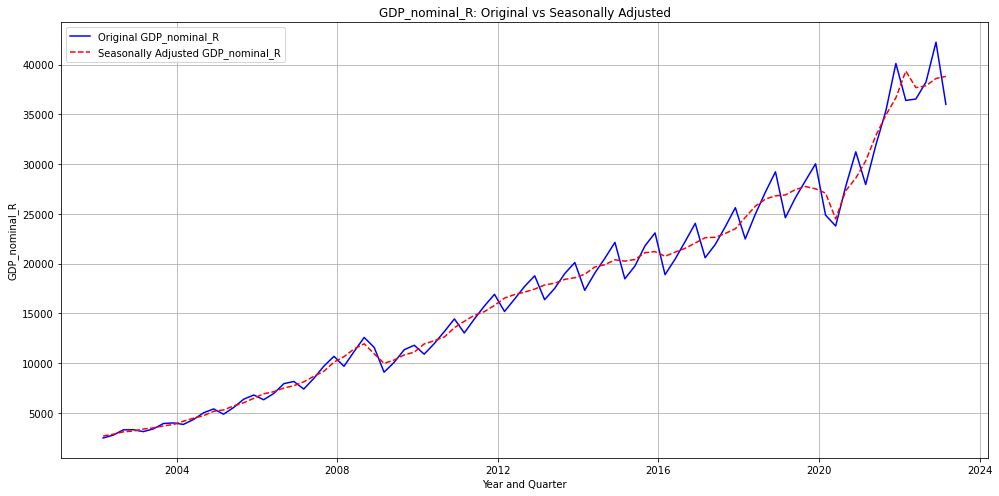

In [33]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plotting the original and seasonally adjusted data
plt.figure(figsize=(14, 7))
plt.plot(quarterly_data['GDP_nominal_R'], label='Original GDP_nominal_R', color='blue')
plt.plot(x13_result.seasadj, label='Seasonally Adjusted GDP_nominal_R', color='red', linestyle='--')
plt.title('GDP_nominal_R: Original vs Seasonally Adjusted')
plt.xlabel('Year and Quarter')
plt.ylabel('GDP_nominal_R')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
#x13_path = '/Users/qnx/MyProjects/Projects/Python/x13as/'
x13_path = '/Users/qnx/MyProjects/Projects/Python/x13as_asciisrc-v1-1-b60/'

#x13as_asciisrc-v1-1-b60


_binary_names = ('x13as.exe', 'x13as', 'x12a.exe', 'x12a',
                 'x13as_ascii', 'x13as_html')

In [7]:
x13_path

'/Users/qnx/MyProjects/Projects/Python/x13as_asciisrc-v1-1-b60/'

In [8]:
from statsmodels.compat.pandas import deprecate_kwarg

import os
import subprocess
import tempfile
import re
from warnings import warn

import pandas as pd

def find_x12(x12path=None, prefer_x13=True):
    """
    If x12path is not given, then either x13as[.exe] or x12a[.exe] must
    be found on the PATH. Otherwise, the environmental variable X12PATH or
    X13PATH must be defined. If prefer_x13 is True, only X13PATH is searched
    for. If it is false, only X12PATH is searched for.
    """
    global _binary_names
    print(x12path.endswith(_binary_names))
    if x12path is not None and x12path.endswith(_binary_names):
        # remove binary from path if path is not a directory
        print(os.path.dirname(x12path))
        if not os.path.isdir(x12path):
            x12path = os.path.dirname(x12path)
            print(x12path)

    if not prefer_x13:  # search for x12 first
        _binary_names = _binary_names[::-1]
        if x12path is None:
            x12path = os.getenv("X12PATH", "")
        if not x12path:
            x12path = os.getenv("X13PATH", "")
    elif x12path is None:
        x12path = os.getenv("X13PATH", "")
        if not x12path:
            x12path = os.getenv("X12PATH", "")

    for binary in _binary_names:
        
        x12 = os.path.join(x12path, binary)
        print(x12)
        try:
            subprocess.check_call(x12, stdout=subprocess.PIPE,
                                  stderr=subprocess.PIPE)
            return x12
        except OSError:
            print("Error: ", OSError)
            pass

    else:
        return False

In [26]:
find_x12(x13_path)

False
/Users/qnx/MyProjects/Projects/Python/x13as_asciisrc-v1-1-b60/x13as.exe
Error:  <class 'OSError'>
/Users/qnx/MyProjects/Projects/Python/x13as_asciisrc-v1-1-b60/x13as
Error:  <class 'OSError'>
/Users/qnx/MyProjects/Projects/Python/x13as_asciisrc-v1-1-b60/x12a.exe
Error:  <class 'OSError'>
/Users/qnx/MyProjects/Projects/Python/x13as_asciisrc-v1-1-b60/x12a
Error:  <class 'OSError'>
/Users/qnx/MyProjects/Projects/Python/x13as_asciisrc-v1-1-b60/x13as_ascii


'/Users/qnx/MyProjects/Projects/Python/x13as_asciisrc-v1-1-b60/x13as_ascii'

In [16]:
quarterly_data = quarterly_data.set_index("date")

KeyError: "None of ['date'] are in the columns"

In [14]:
quarterly_data[['GDP_nominal_R']]

,GDP_nominal_R
0,2464.784597
1,2755.135153
2,3282.628439
3,3297.953297
4,3106.440187
...,...
88,NaN
89,NaN
90,NaN
91,NaN


In [13]:
X13PATH=x13_path

x13_result = x13_arima_analysis(quarterly_data[['GDP_nominal_R']],
                                    x12path=x13_path  # Provide the path to your x13as binary
                                    )
  


ValueError: Only monthly and quarterly periods are supported. Please report or send a pull request if you want this extended.

In [ ]:
# Aggregate the monthly calendar data to quarterly frequency
calendar_quarterly = calendar_data.resample('Q', on='date').sum()





In [ ]:
def seasonal_adjustment_with_x13(data, calendar_data, target_variable):
    # Aggregate the monthly calendar data to quarterly frequency
    calendar_quarterly = calendar_data#calendar_data.resample('Q', on='date').sum()
    x13_path = '/Users/qnx/MyProjects/Projects/Python/x13as2/'
    

    # Merge the aggregated calendar data with the main data
    merged_data = pd.merge(data, calendar_quarterly, left_on='Date', right_on='date', how='left')

    # Seasonal adjustment with x13_arima_analysis
    # Note: This requires the X-13ARIMA-SEATS software to be installed locally
    x13_result = x13_arima_analysis(merged_data[target_variable], 
                                    x12path=x13_path,  # Provide the path to your x13as binary
                                    exog = ['working', 'leap'])
    
    # Extract the seasonally adjusted series
    merged_data[f'{target_variable}_adjusted'] = x13_result.seasadj
    
    return merged_data





Important Notes:

You need to replace '/path/to/x13as' with the path to the X-13ARIMA-SEATS binary on your machine.
Ensure you have statsmodels installed (pip install statsmodels).
This code assumes you have the X-13ARIMA-SEATS software installed on your machine. If you don't have it, you can download it from the official US Census Bureau website.
Make sure to read your data into the variables quarterly_data and calendar_data before running the function.
This should give you a starting point for running seasonal adjustments locally. Adjust the code as needed based on your specific requirements and setup.



In [ ]:

# Assuming you've read your data into the variables 'quarterly_data' and 'calendar_data'
adjusted_data = seasonal_adjustment_with_x13(quarterly_data, calendar_quarterly, 'GDP_nominal_R')

print(adjusted_data[['Date', 'GDP_nominal_R', 'GDP_nominal_R_adjusted']])



In [ ]:
# Function to perform seasonal adjustment using X-13ARIMA-SEATS
def adjust_series(series, name, exog=None):
    try:
        result = x13_arima_analysis(series, exog=exog)
        print('seasonal adjustment ok: ', name)
        return result.seasadj
    except Exception as e:
        print('seasonal adjustment error: ', name,' ', e)
        return series  # If adjustment fails, return the original series


In [ ]:
# Exogenous variables
exog_vars = calendar_data #merged_data[['working', 'leap']]

# Storing adjusted series
adjusted_data = {}
for column in quarterly_data.columns:
    if column != "Date":  # Exclude the Date column
        adjusted_data[column] = adjust_series(quarterly_data[column], name=column, exog=exog_vars)

# Convert the dictionary to a DataFrame
adjusted_df = pd.DataFrame(adjusted_data)
adjusted_df.insert(0, "Date", quarterly_data["Date"])  # Inserting the Date column


In [ ]:
adjusted_df.tail()

In [ ]:
# Saving the adjusted data to a new sheet in the Excel file
with pd.ExcelWriter(import_file_path, mode='a', engine='openpyxl') as writer:
    adjusted_df.to_excel(writer, index=False, sheet_name='quarterly_sa')


In [ ]:
# Plotting initial GDP_real series and its seasonal adjustment
plt.figure(figsize=(14, 7))
plt.plot(quarterly_data["Date"], quarterly_data["GDP_real"], label="Initial GDP_real", color='blue')
plt.plot(adjusted_df["Date"], adjusted_df["GDP_real"], label="Seasonally Adjusted GDP_real", color='red', linestyle='--')
plt.title("Initial vs Seasonally Adjusted GDP_real")
plt.xlabel("Date")
plt.ylabel("GDP_real")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()